In [1]:
import pandas as pd
import os
import numpy as np
import sys
sys.path.append("../../../ukb-dementia-shap/")


from logic.data_processing.data_setup import *
from logic.analysis.analysis import AnalysisCharts
from pandas.tseries.offsets import DateOffset

ds=data_setup()
an=AnalysisCharts()
dp=data_proc_main()

#creation of file with just eids from parquet file

def create_eids(infile='../../mental_health/data/df_schiz.parquet',outfile='../data/schiz_eids.txt',
               normvars=['overall_health_rating_f2178_0_0','age_when_attended_assessment_centre_f21003_0_0'],
               depvar='schiz',max_mult=1):

    df=pd.read_parquet(infile)

    df1=ds.varnorm(df=df,normvars=normvars,depvar=depvar,max_mult=max_mult)

    eids=list(df1['eid'])
    with open(outfile, 'w') as f:
        for e in eids:
            f.write("%s\n" % e)

In [88]:
df_sg=pd.read_parquet('../data/schiz_genotype_array/df_schiz__chrom_1.parquet')

In [89]:
df_sg

,rs28659788,rs116587930,rs116720794,rs3131972,rs12184325,rs3131962,rs114525117,rs3115850,rs115991721,rs12562034,...,rs6704311,rs74157349,rs139943172,rs41305584,rs77124333,rs150352847,rs41308182,rs74322946,rs114152372,eid
541,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2111734
805,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5572229
1068,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5376191
1503,NaN,0.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4347680
1982,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3925944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5320141
487384,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4857254
487796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3710122
487948,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4258014


In [79]:
#!pip install umap
import umap

In [ ]:
#
create_eids()

In [2]:
ml.config['max_depth']=2

In [16]:
anorm_dfs_dict=pd.read_pickle('../../PD/data/anorm_dfs_dict.pkl')
df1=anorm_dfs_dict['anorm_dfs'][2]

In [17]:
eids=[str(c[0]) for c in pd.read_csv('../data/PD_eids.txt').values]

In [18]:
check_eids=list(df1.loc[(df1['PD']==1)&(df1['eid'].isin(eids)),'eid'].sample(500))+\
list(df1.loc[(df1['PD']==0)&(df1['eid'].isin(eids)),'eid'].sample(500))

In [19]:
model_eids=list(df1.loc[~(df1['eid'].isin(check_eids)),'eid'])

In [20]:
pd_files=[f for f in os.listdir('../data/PD_genotype_array')  if '.parquet' in f and '1_22' not in f]

In [69]:
#script picks in


for i,f in enumerate(pd_files):
    
    mergecols=['eid','PD','age_when_attended_assessment_centre_f21003_0_0']
    cols2=['PD','age_when_attended_assessment_centre_f21003_0_0']
    
    df=pd.read_parquet('../data/PD_genotype_array/'+f)
    df=pd.merge(df,df1[mergecols],on='eid',how='inner')
    print(df['eid'])
    df2=df.loc[(df['eid'].isin(check_eids)),]
    PD_means=dict(zip([c for c in df2.columns if c!='eid'],\
[df2['PD'][(df2[c]!=0)].mean() for c in df2.columns if c!='eid']))
    
    #usecols=[c for c in [c for c in df2.columns if c!='eid' and c!='PD' ]
    #         if PD_means[c]<0.1 or PD_means[c]>0.9]+['eid']
    
    usecols=df2.columns
    
    
    df3=df.loc[(df['eid'].isin(model_eids)),usecols]
    

    if i==0:
        df_full=df3.copy()
    else:
        df_full=pd.merge(df_full,df3,on='eid',how='inner')
        

0       2607352
1       3922071
2       1389694
3       1508671
4       1041536
         ...   
4229    2817398
4230    5335332
4231    5947430
4232    5827547
4233    4728862
Name: eid, Length: 4234, dtype: object
0       2607352
1       3922071
2       1389694
3       1508671
4       1041536
         ...   
4229    2817398
4230    5335332
4231    5947430
4232    5827547
4233    4728862
Name: eid, Length: 4234, dtype: object
0       2607352
1       3922071
2       1389694
3       1508671
4       1041536
         ...   
4229    2817398
4230    5335332
4231    5947430
4232    5827547
4233    4728862
Name: eid, Length: 4234, dtype: object
0       2607352
1       3922071
2       1389694
3       1508671
4       1041536
         ...   
4229    2817398
4230    5335332
4231    5947430
4232    5827547
4233    4728862
Name: eid, Length: 4234, dtype: object
0       2607352
1       3922071
2       1389694
3       1508671
4       1041536
         ...   
4229    2817398
4230    5335332
4231    5947

In [70]:
labs=df1.loc[(df1['eid'].isin(df['eid'])),['eid','age_when_attended_assessment_centre_f21003_0_0','PD']]

In [71]:
df_model=pd.merge(df_full,labs,on='eid',how='inner')

In [72]:
df_model.shape

(3263, 740510)

In [28]:
df_model['PD'].sum()

1624

In [59]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(probability=True)
clf.fit(X, y)

SVC(probability=True)

In [42]:
df_model.fillna(0,inplace=True)

In [73]:
cases=df_model.loc[(df_model['PD']==1),]
controls=df_model.loc[(df_model['PD']==0),]

df_train=pd.concat([cases.sample(int(round(len(cases)*0.7,0))),controls.sample(int(round(len(cases)*0.7,0)))],axis=0)

df_test=df_model.loc[~(df_model['eid'].isin(df_train['eid'])),]

In [75]:
import umap

In [80]:
    embedding = umap.UMAP(n_neighbors=200,
                          min_dist=0.3,
                          metric='correlation',n_components=20).fit_transform(df_train)

AttributeError: module 'umap' has no attribute 'UMAP'

In [52]:
df_test.shape

(989, 14536)

In [60]:
predvars=[c for c in df_model.columns if not re.search('age_when|PD',c)]
X_train=df_train[predvars]
y_train=df_train['PD']
X_test=df_test[predvars]
y_test=df_test['PD']
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [63]:
probs=clf.predict_proba(X_test)

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4943461141595295,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49464687761855936,
 0.5,
 0.5,
 0.4944149594359137,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49259428923692145,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4939998683967365,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4947682496266444,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49292162350518964,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49308224454620664,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49486425780195337,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49258374366326163,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.493317247283887,
 0.5,
 0.5,
 0.49295174462290314,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4930532005306734,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 

In [67]:
df_out=df_test.copy()
df_out['y_test']=df_out['PD']
df_out['risk']=[p[0] for p in probs]

In [55]:
np.mean(clf.predict(X_test)-y_test)

-0.13549039433771487

In [68]:
ml.ROCAUC_tuples(df_out_list=[df_out],
                 labels=['SVM'],cols=['blue'],figname='ROCAUC ',stream=None)



TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [78]:
df_model.shape

(3266, 14207)

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

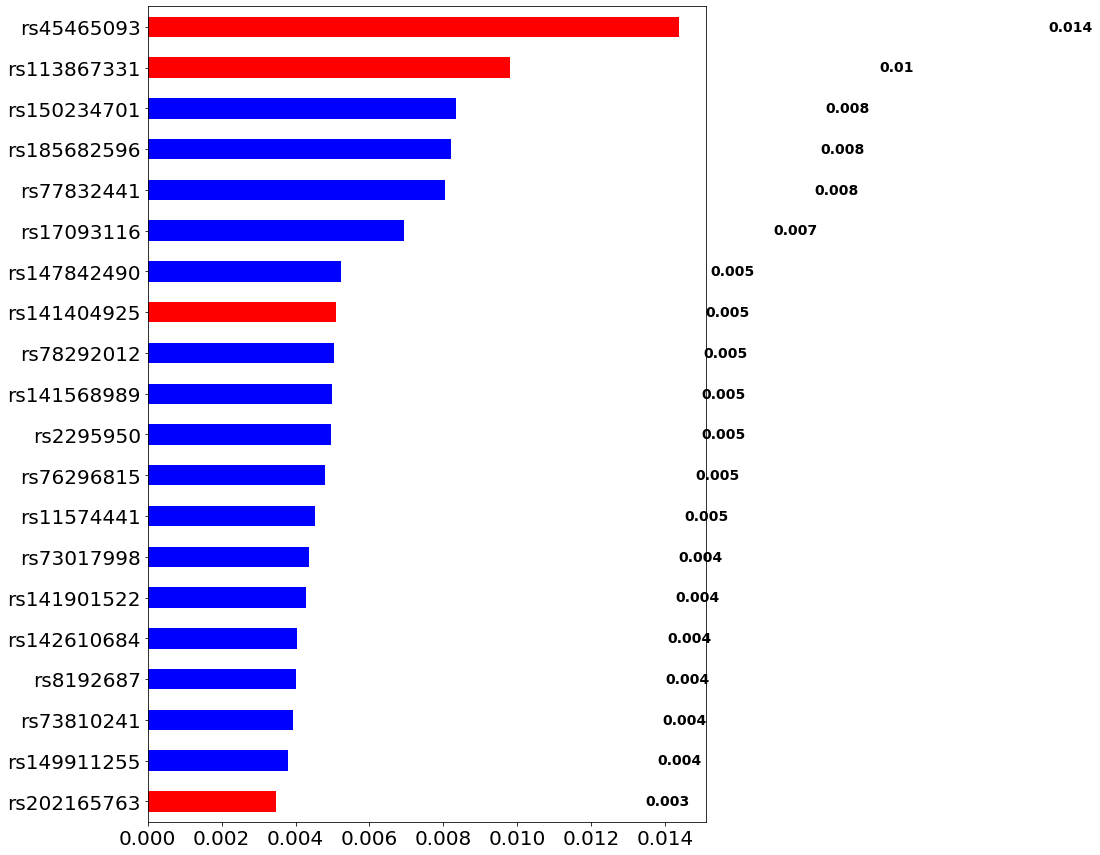

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

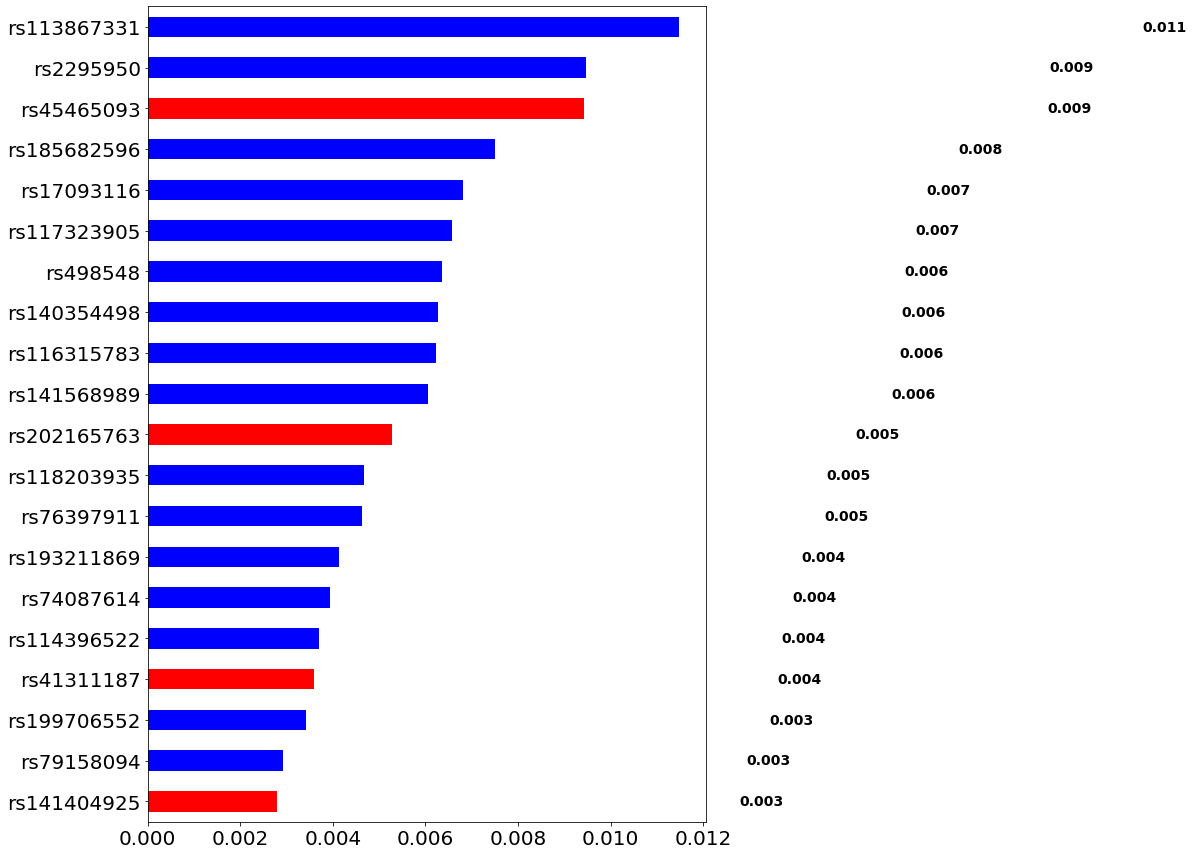

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

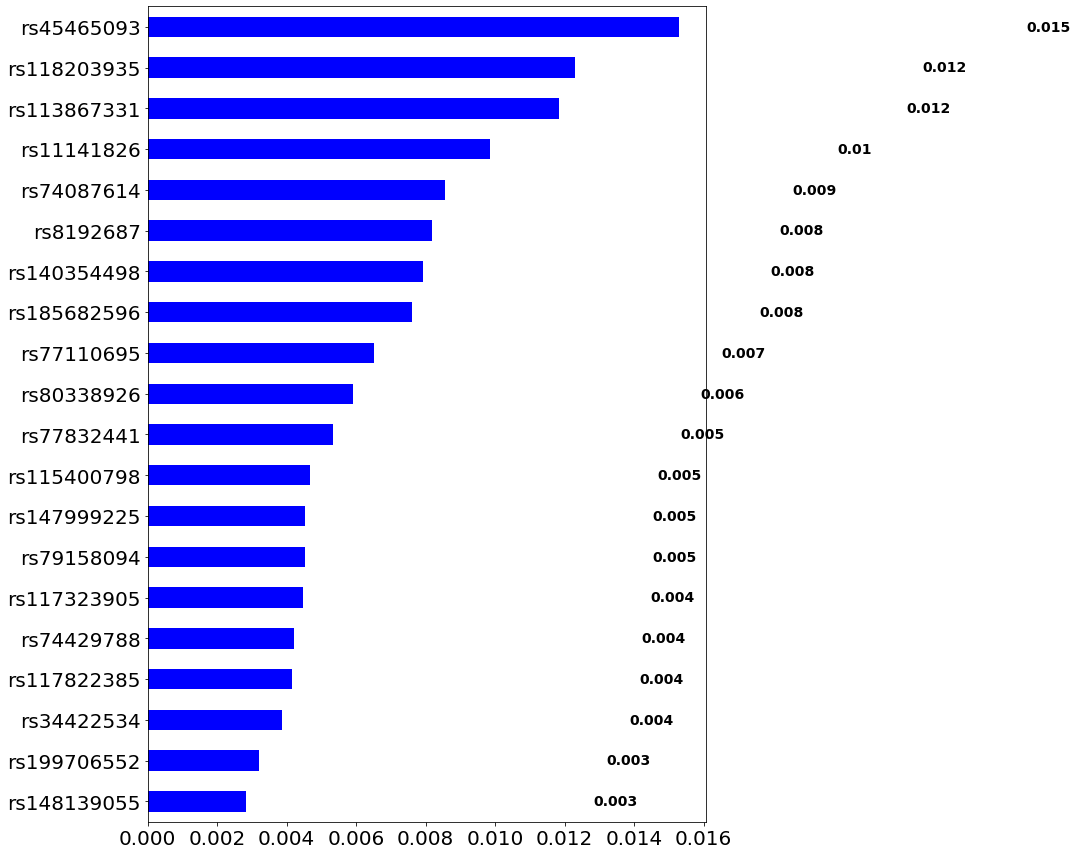

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

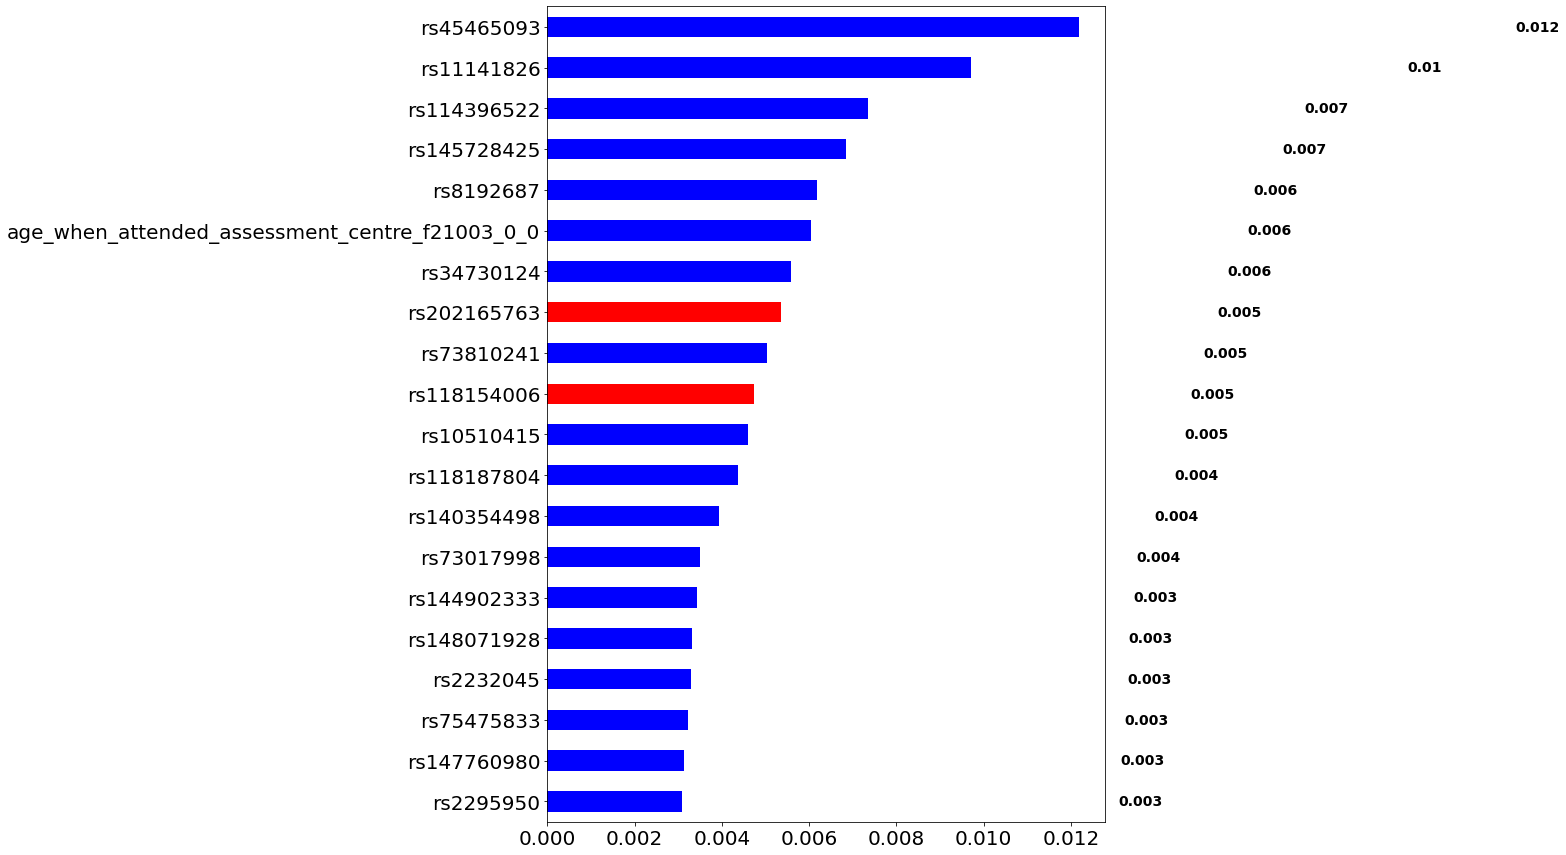

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

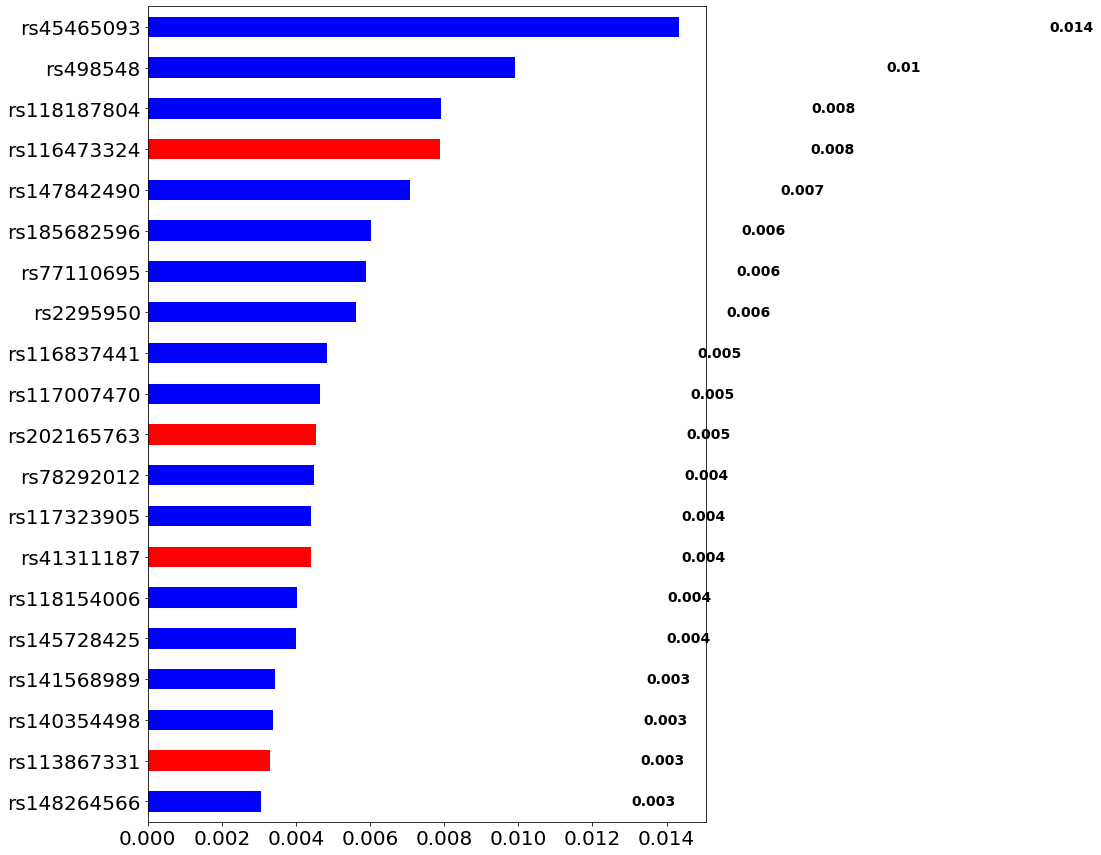

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

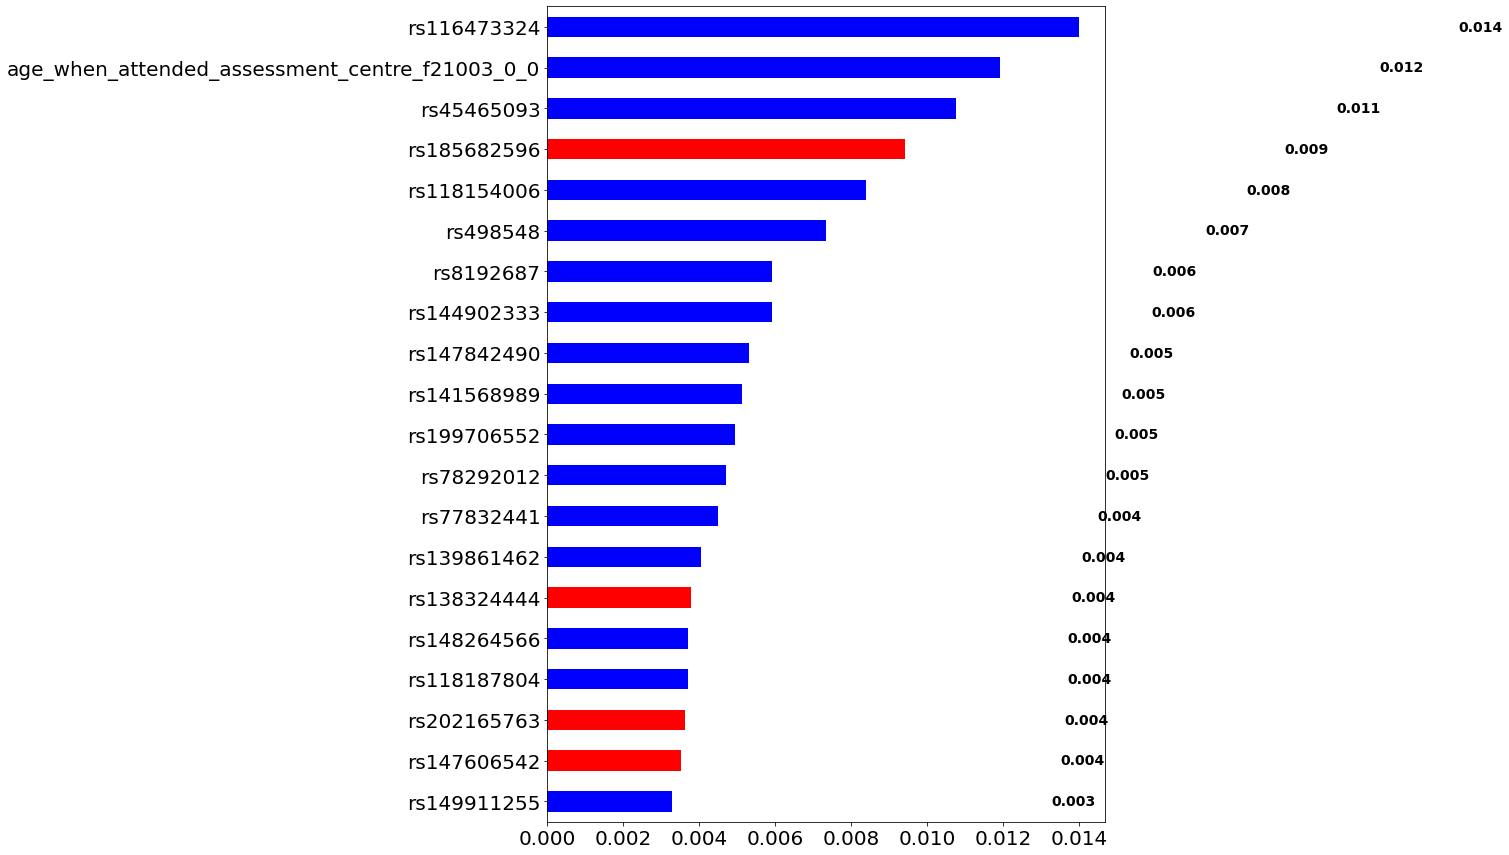

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

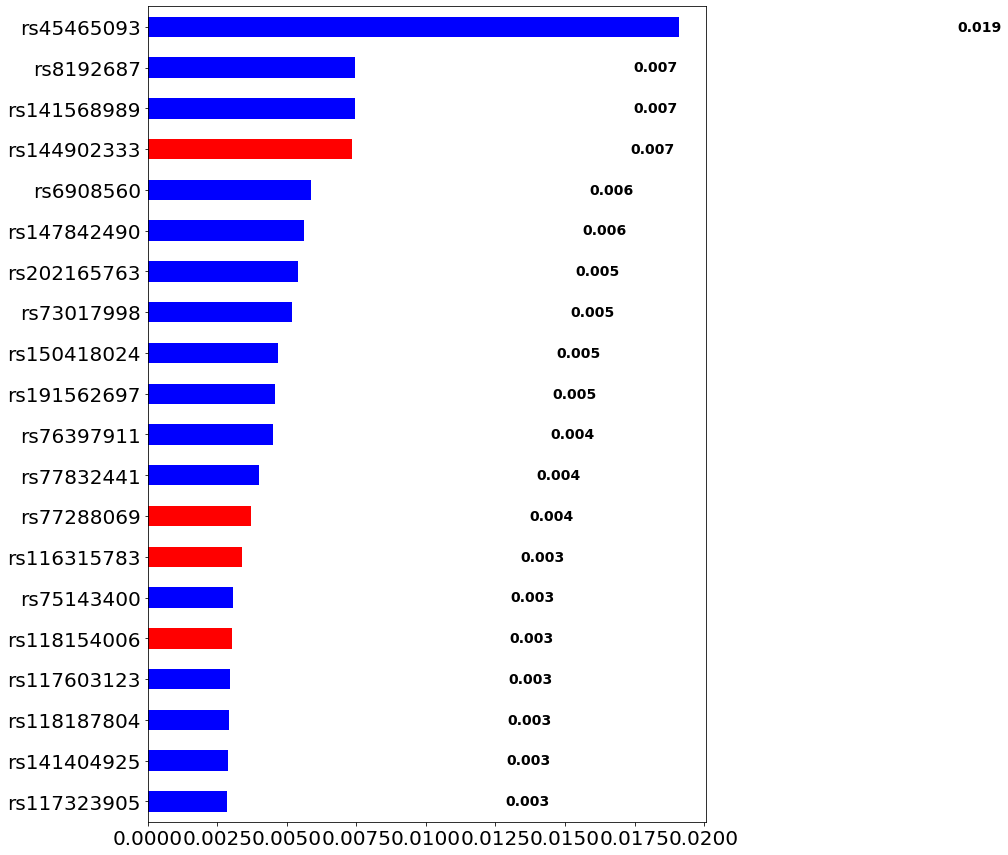

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

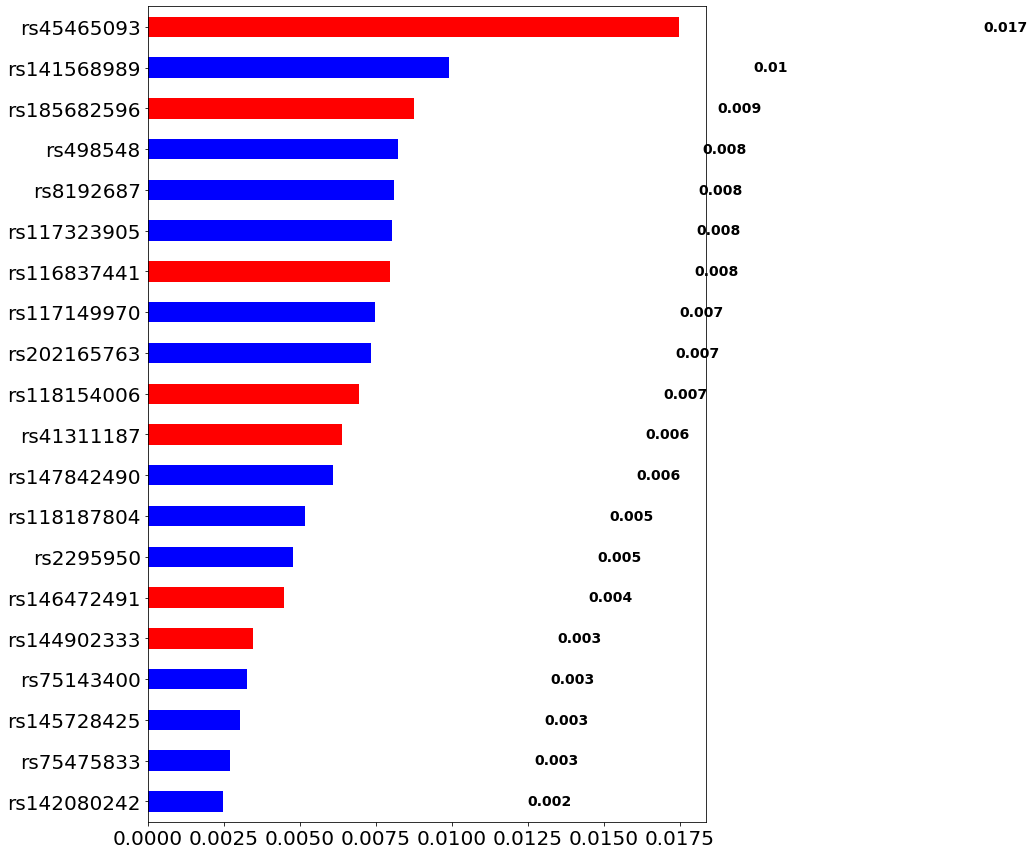

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

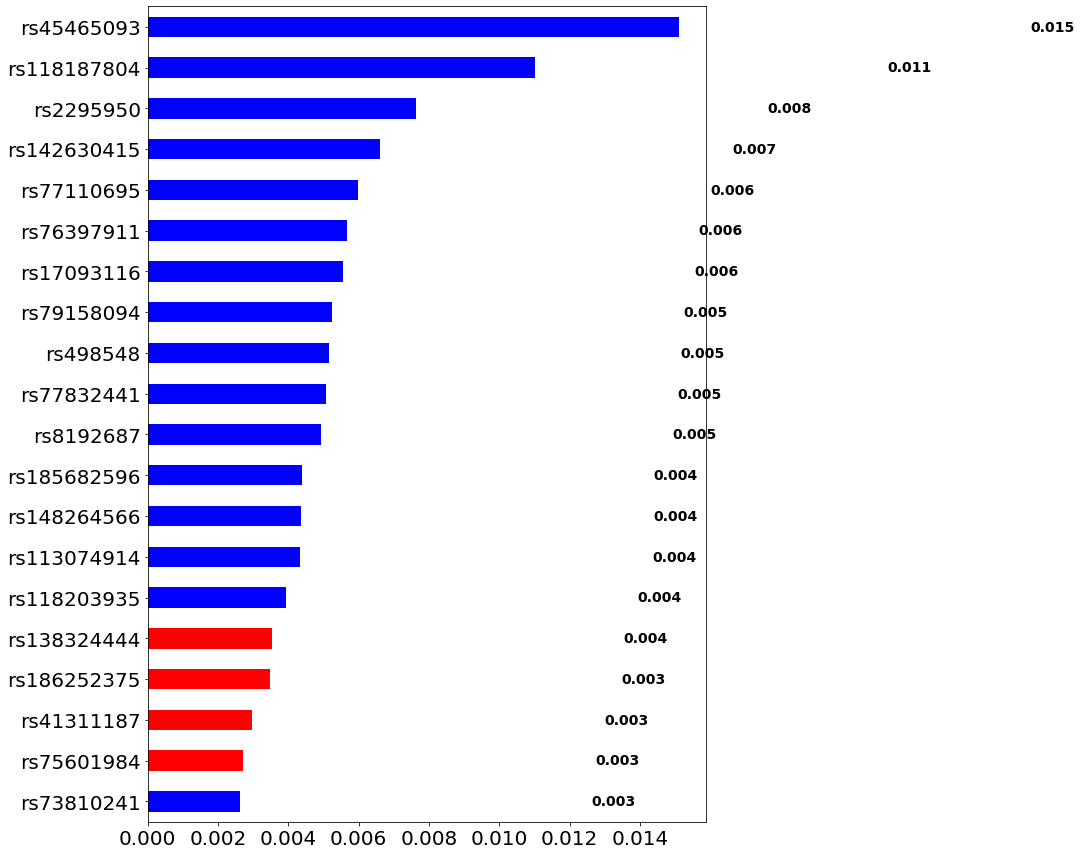

Total PD in data: 1626
size of holdout 653
4


<Figure size 2000x3000 with 0 Axes>

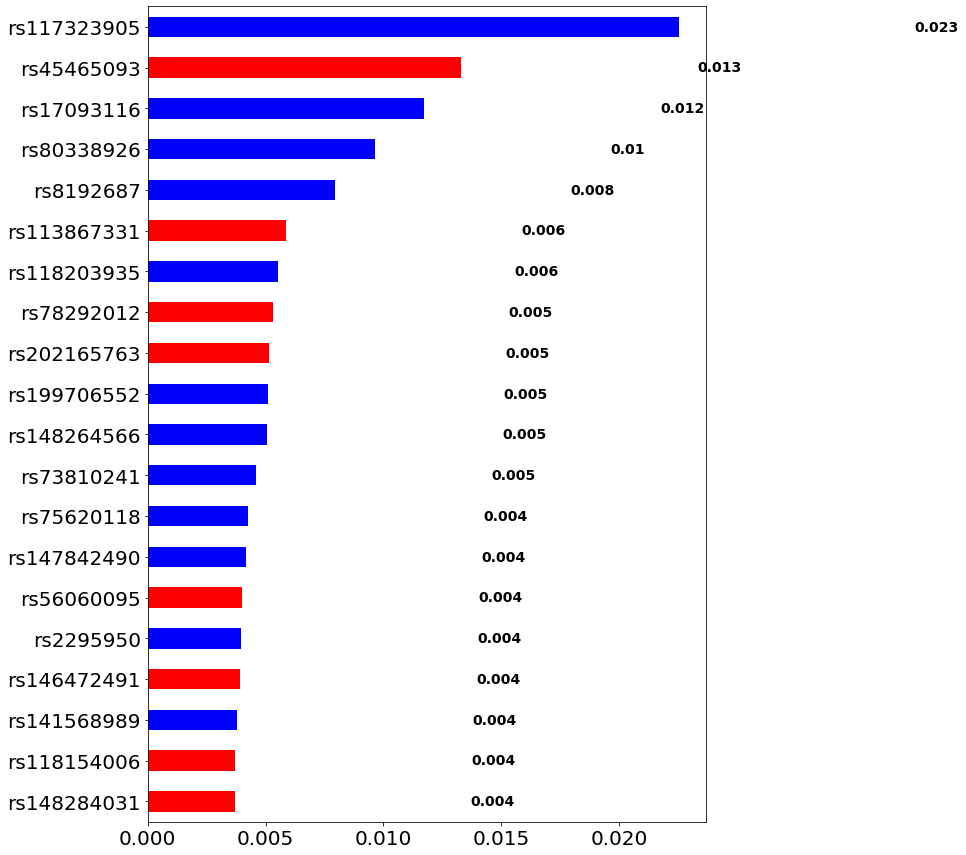

In [79]:
drops='xxx'
remwords='xxx'
for i in range(10):
    shap_tuple_all1=ml.run_entire_data_pd(df=df_model,runs=1,resize=0,outfile='test.pkl',
                                              drops=drops,wordsremove=remwords)   
    

In [80]:
df_out=shap_tuple_all1[2][0]

<Figure size 2000x3000 with 0 Axes>

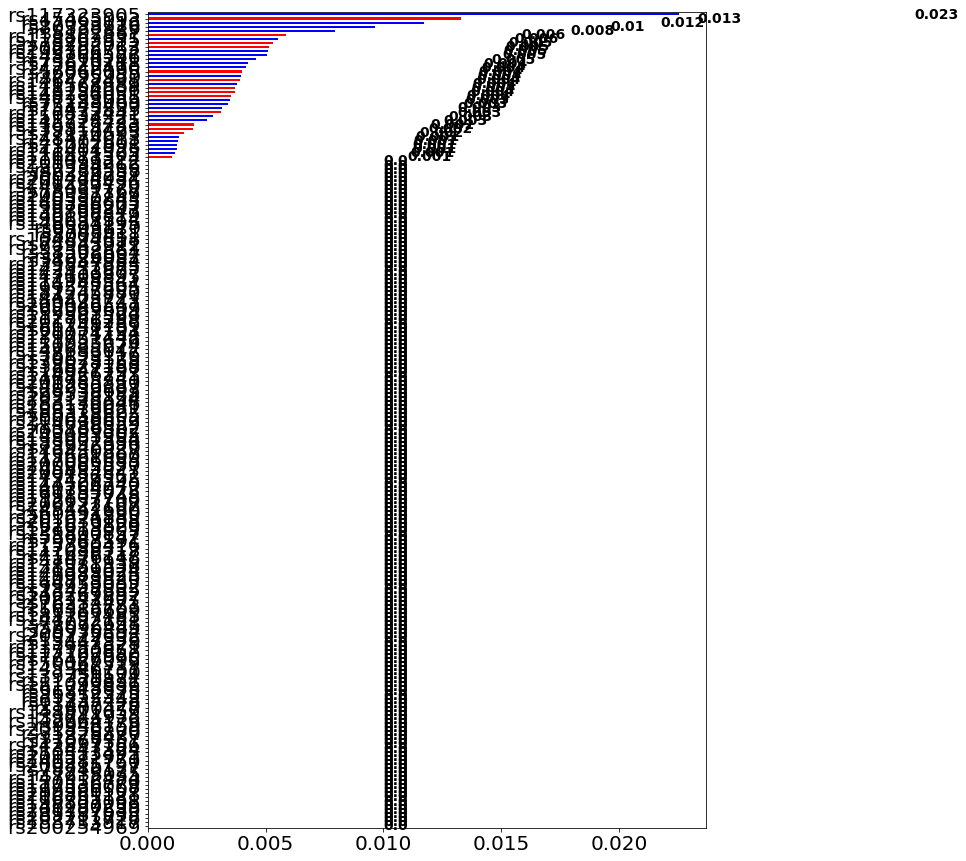

In [81]:
feats_all=ml.shapgraphs_tuple(shap_tuple_all1,max_disp=200,figname='SHAP chrom1 test')

In [85]:
feats_all

,Variable,SHAP_abs,Corr,Sign,v2
4771,rs200254969,0.000000,0.000000,blue,rs200254969
4772,rs188733917,0.000000,0.000000,blue,rs188733917
4813,rs202211726,0.000000,0.000000,blue,rs202211726
4773,rs189787035,0.000000,0.000000,blue,rs189787035
4775,rs201107680,0.000000,0.000000,blue,rs201107680
...,...,...,...,...,...
1522,rs8192687,0.007936,0.000000,blue,rs8192687
2960,rs80338926,0.009639,0.000000,blue,rs80338926
8802,rs17093116,0.011734,-0.998885,blue,rs17093116
383,rs45465093,0.013312,0.999989,red,rs45465093


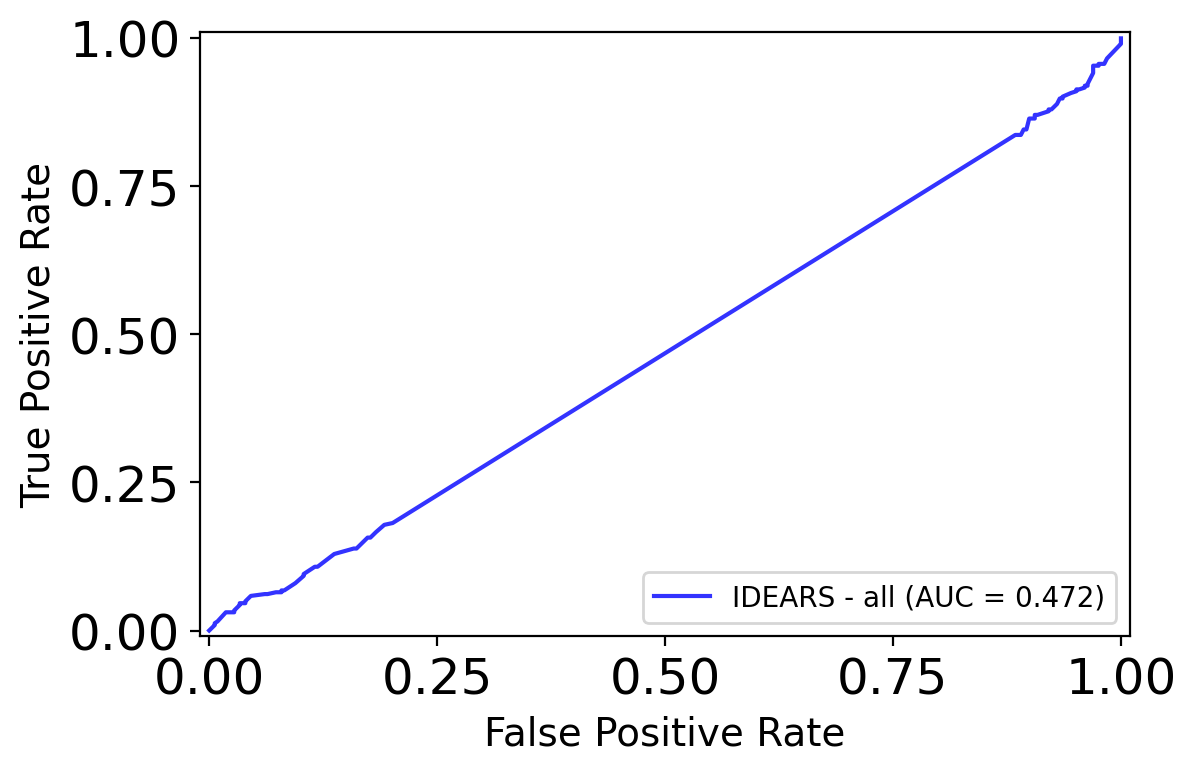

[0.4717964352720449]

In [84]:
ml.ROCAUC_tuples(df_out_list=[shap_tuple_all1[2]],
                 labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC ',stream=None)


In [128]:
df_out

,rs28659788,rs116587930,rs116720794,rs3131972,rs12184325,rs3131962,rs114525117,rs3115850,rs115991721,rs12562034,...,rs150352847,rs41308182,rs74322946,rs114152372,eid,PD,age_when_attended_assessment_centre_f21003_0_0,risk,y_pred,y_test
2835,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3636268,1,64.0,0.574796,1,1
141,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4358851,1,66.0,0.483546,0,1
488,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2942069,1,61.0,0.458680,0,1
2580,NaN,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3932445,1,65.0,0.452960,0,1
246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5903418,1,69.0,0.467006,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4545849,0,60.0,0.585396,1,0
4137,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5394513,0,61.0,0.444513,0,0
2920,NaN,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3864886,0,67.0,0.619000,1,0
3874,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1995233,0,63.0,0.363124,0,0


In [133]:
df_out['y_test'].sum()

420

In [134]:
ml.plot_ROCAUC_mult(y_test=df_out['y_test'],y_score=df_out['risk'],
                    labels=['AUCs'],cols=['red'] ,figname='check',figx=6,figy=4,format_out='.svg',stream=False)

KeyError: 0

<Figure size 1200x800 with 0 Axes>

In [116]:
df['PD'].value_counts()

0    2132
1    2102
Name: PD, dtype: int64

In [154]:
df2=df.sample(1000)

In [155]:
df3=df.loc[(df['eid'].isin(df2['eid'])),]

In [156]:
PD_means=dict(zip([c for c in df2.columns if c!='eid'],\
[df2['PD'][(df[c]!=0)].mean() for c in df2.columns if c!='eid']))

In [163]:
newcols=[c for c in PD_means if PD_means[c]<0.3 or PD_means[c]>0.7]+\
['eid','age_when_attended_assessment_centre_f21003_0_0']

In [164]:
df4=df3[newcols]

In [165]:
df4

,rs59771807,rs2001730,rs200584816,rs200048444,rs144656266,rs138690517,rs147703918,rs199823418,rs199749406,rs201680039,...,rs149112732,rs148798792,rs35895648,rs199639534,rs113149175,rs139943172,rs150352847,PD,eid,age_when_attended_assessment_centre_f21003_0_0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2607352,66.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1041536,61.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4782637,68.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3397737,66.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1165857,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1563512,68.0
4208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2854560,69.0
4211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4074808,68.0
4221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3569069,69.0


Total PD in data: 494
size of holdout 200
4


<Figure size 2000x3000 with 0 Axes>

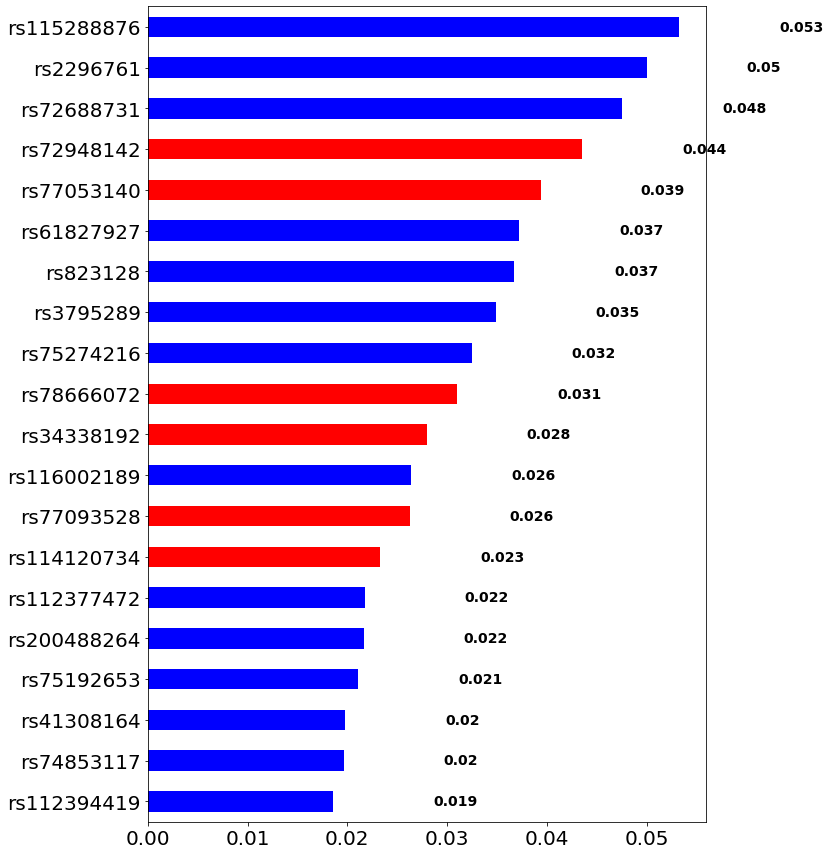

Total PD in data: 494
size of holdout 200
4


<Figure size 2000x3000 with 0 Axes>

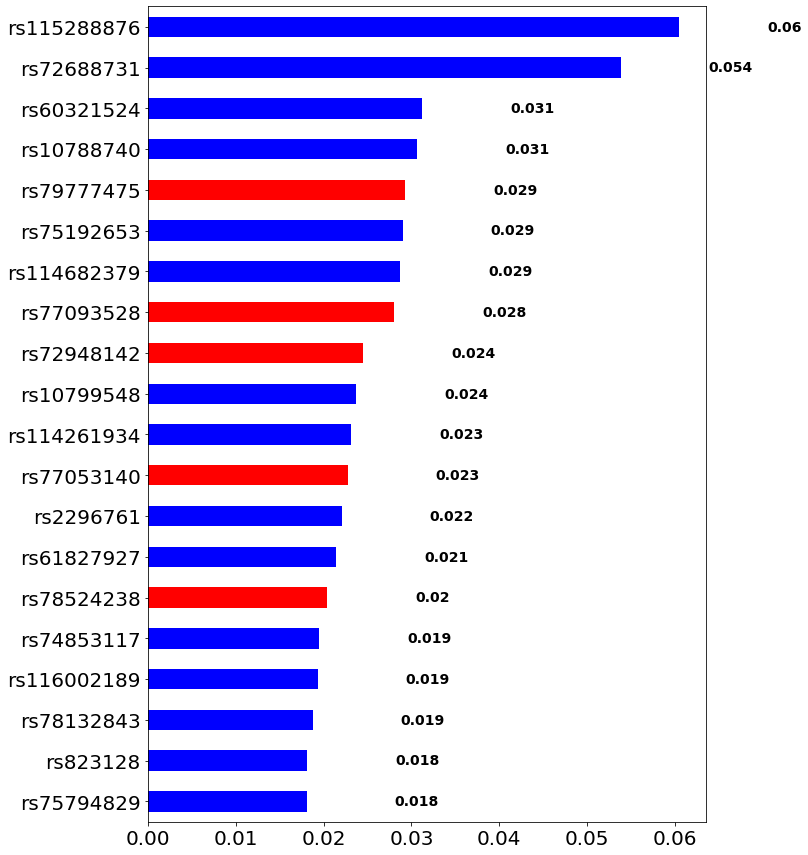

Total PD in data: 494
size of holdout 200
4


<Figure size 2000x3000 with 0 Axes>

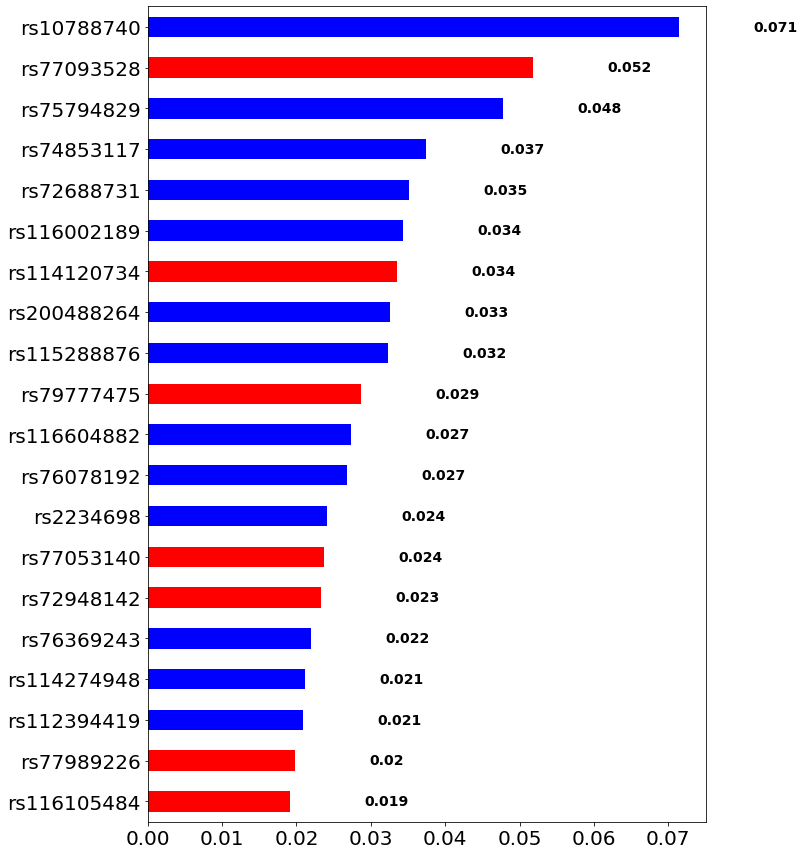

In [166]:
drops='xxx'
remwords='xxx'
for i in range(3):
    shap_tuple_all1=ml.run_entire_data_pd(df=df4,runs=1,resize=0,outfile='test.pkl',
                                              drops=drops,wordsremove=remwords)   



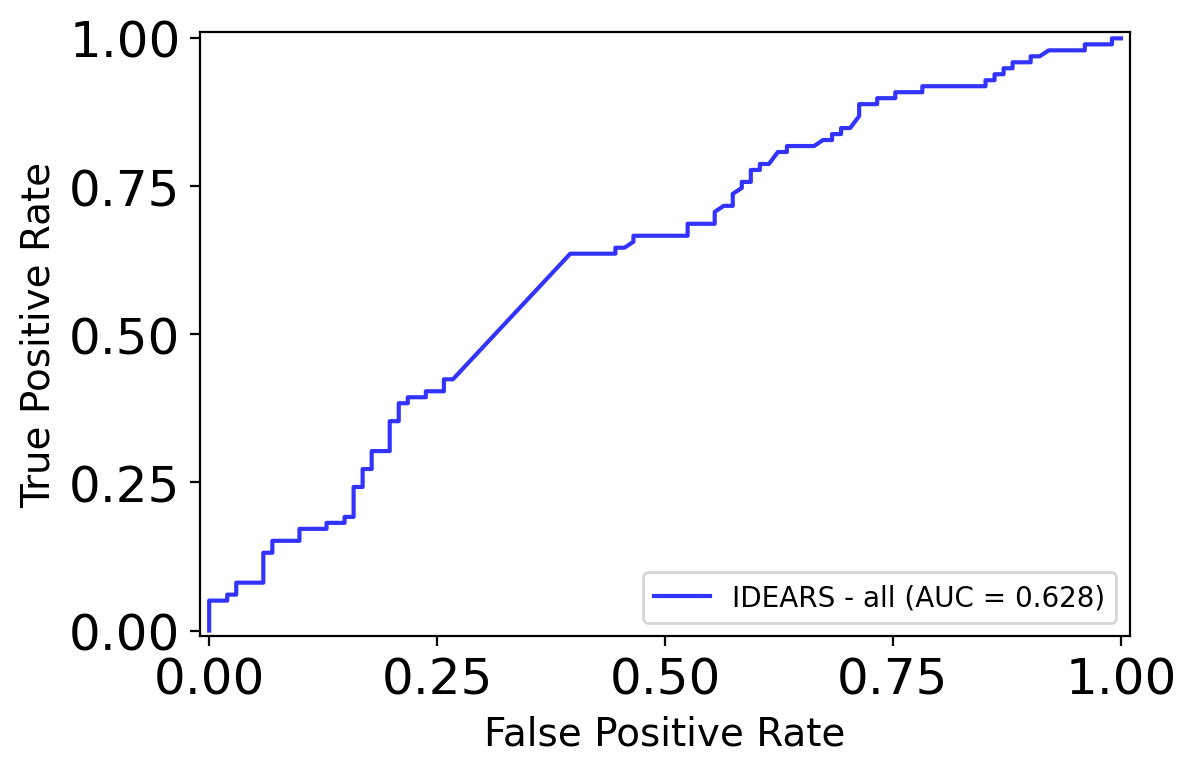

[0.628062806280628]

In [167]:
ml.ROCAUC_tuples(df_out_list=[shap_tuple_all1[2]],
                 labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC ',stream=None)



In [100]:
chr1_counts=zip([c for c in df.columns if c!='eid'],[df[c][(df[c]!=0)].shape[0] for c in df.columns if c!='eid'])

2609

In [102]:
chr1_counts=dict(chr1_counts)

In [106]:
len(chr1_counts)

59682

In [105]:
len([c for c in chr1_counts if chr1_counts[c]>1000])

20167

In [ ]:
for i,f in enumerate(pd_files):
    df=pd.read_parquet('../data/PD_genotype_array/'+f)
    print(f)
    if i==0:
        df_full=df.copy()
    else:
        df_full=pd.merge(df_full,df,on='eid',how='outer')
        print('size: ',df_full.shape)
        

df_chrPD_ctrl_chrom_6.parquet
df_chrPD_ctrl_chrom_13.parquet
size:  (4234, 76914)
df_chrPD_ctrl_chrom_7.parquet
size:  (4234, 117189)
df_chrPD_ctrl_chrom_12.parquet
size:  (4234, 152363)
df_chrPD_ctrl_chrom_5.parquet
size:  (4234, 196199)
df_chrPD_ctrl_chrom_10.parquet
size:  (4234, 232703)
df_chrPD_ctrl_chrom_19.parquet
size:  (4234, 255775)
df_chrPD_ctrl_chrom_18.parquet
size:  (4234, 277015)
df_chrPD_ctrl_chrom_4.parquet
size:  (4234, 322933)
df_chrPD_ctrl_chrom_11.parquet
size:  (4234, 360180)
df_chrPD_ctrl_chrom_14.parquet
size:  (4234, 384287)
df_chrPD_ctrl_chrom_1.parquet


In [4]:
df=pd.read_excel('../data/snps_UKB.xlsx')

,eid,PD
5,1000113,0
408,1005778,0
597,1008431,0
630,1008943,0
1089,1015832,0
...,...,...
335743,6010028,1
335927,6012792,1
336439,6020005,1
336445,6020084,1


In [60]:
df2=ds.varnorm(df=df1,normvars=['age_when_attended_assessment_centre_f21003_0_0'],depvar='PD',max_mult=1)

In [62]:
eids=list(df2['eid'])

In [63]:
with open('../data/PD_eids.txt', 'w') as f:
    for e in eids:
        f.write("%s\n" % e)

In [79]:
eids=[str(c[0]) for c in pd.read_csv('../data/PD_eids.txt').values]

In [18]:
for i in list(df['chr_id'].unique()):

    mask=(df['chr_id']==i)&(df['rs_id_name'].apply(lambda x:len(x)>5))
    rs_ids=list(df.loc[mask,'rs_id_name'].unique())

    with open('../data/chr'+str(i)+'_all.txt', 'w') as f:
        for item in rs_ids:
            f.write("%s\n" % item)

In [21]:
files=['ukb22418_c10_b0_v2.bed', 'ukb22418_c19_b0_v2_s488244.fam', 'ukb_snp_chr8_v2.bim',
       'ukb22418_cXY_b0_v2_s488244.fam', 'ukb22418_cX_b0_v2_s488244.fam', 'ukb22418_c4_b0_v2_s488244.fam',
       'ukb_snp_chr6_v2.bim', 'ukb22418_c13_b0_v2.bed', 'ukb22418_c8_b0_v2_s488244.fam', 'ukb_snp_chr20_v2.bim',
       'ukb_snp_chrMT_v2.bim', '.ukbkey', 'ukb_snp_chr21_v2.bim', 'ukb22418_c16_b0_v2.bed', 
       'ukb22418_c17_b0_v2.bed', 'ukb22418_c14_b0_v2_s488244.fam', 'ukb_snp_chrXY_v2.bim',
       'ukb22418_cX_b0_v2.bed', 'ukb22418_c1_b0_v2_s488244.fam', 'ukb22418_c5_b0_v2_s488244.fam',
       'ukb_snp_chr18_v2.bim', 'ukb22418_cY_b0_v2.bed', 'ukb22418_c19_b0_v2.bed', 'ukb22418_c22_b0_v2.bed',
       'ukb22418_c18_b0_v2_s488244.fam', 'ukb22418_c10_b0_v2_s488244.fam', 'ukb_snp_chr1_v2.bim',
       'ukb_snp_chrX_v2.bim', 'ukb_snp_chrY_v2.bim', 'ukb22418_c5_b0_v2.bed', 
       'ukb_genetic_data_description_v3-1.txt', 'ukb22418_c3_b0_v2.bed', 'ukb22418_c11_b0_v2_s488244.fam',
       'ukb22418_c13_b0_v2_s488244.fam', 'ukb22418_c1_b0_v2.bed', 'ukb22418_cXY_b0_v2.bed',
       'ukb22418_c14_b0_v2.bed', 'ukb22418_c15_b0_v2.bed', 'ukb22418_c2_b0_v2.bed', 'ukb22418_c6_b0_v2.bed',
       'ukb22418_c15_b0_v2_s488244.fam', 'ukb22418_c12_b0_v2_s488244.fam', 'ukb_snp_chr19_v2.bim',
       'ukb22418_cY_b0_v2_s488244.fam', 'ukb_snp_chr10_v2.bim', 'ukb22418_c11_b0_v2.bed', 'ukb_snp_chr11_v2.bim',
       'ukb_snp_chr22_v2.bim', 'ukb22418_c17_b0_v2_s488244.fam', 'ukb_snp_chr17_v2.bim', 
       'ukb22418_c21_b0_v2_s488244.fam', 'ukb_snp_bim.tar', 'ukb22418_c3_b0_v2_s488244.fam', 
       'ukb_snp_chr3_v2.bim', 'ukb_snp.md5', 'ukb_snp_chr9_v2.bim', 'ukb22418_cMT_b0_v2_s488244.fam',
       'ukb22418_c4_b0_v2.bed', 'ukb22418_c21_b0_v2.bed', 'ukb22418_c18_b0_v2.bed', 'ukb_snp_chr12_v2.bim',
       'ukb22418_c9_b0_v2_s488244.fam', 'ukb22418_c20_b0_v2.bed', 'ukb22418_c20_b0_v2_s488244.fam', 
       'ukb22418_c6_b0_v2_s488244.fam', 'ukb22418_c9_b0_v2.bed', 'ukb22418_c2_b0_v2_s488244.fam', 
       'ukb22418_c16_b0_v2_s488244.fam', 'ukb22418_c7_b0_v2_s488244.fam', 'ukb_snp_chr16_v2.bim', 
       'ukb22418_c12_b0_v2.bed', 'ukb1_1615778320_4761.tmp_bulk', 'ukb_snp_chr14_v2.bim',
       'ukb22418_c8_b0_v2.bed', 'ukb22418_c7_b0_v2.bed', 'ukb1_1615766175_22143.tmp_bulk',
       'ukb22418_cMT_b0_v2.bed', 'ukb_snp_chr13_v2.bim', 'ukb_snp_chr2_v2.bim', 'ukb_snp_chr5_v2.bim',
       'ukb_snp_chr15_v2.bim', 'ukb22418_c22_b0_v2_s488244.fam', 'ukb_snp_chr4_v2.bim', 'ukb_snp_chr7_v2.bim']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [49]:
#chrom_num=4
    
all_chroms=list(np.arange(1,24))

for chrom_num in all_chroms:
    files2=[c for c in files if 'c'+str(chrom_num)+'_' in c or 'chr'+str(chrom_num)+'_' in c]
    
    if len(files2)==3:
        bed_file=[f for f in files2 if 'bed' in f][0]
        fam_file=[f for f in files2 if 'fam' in f][0]
        bim_file=[f for f in files2 if 'bim' in f][0]
        bashCommand="sudo ./plink --bed "+bed_file+" --bim "+bim_file+" --fam "+fam_file+\
        " --extract chr"+str(chrom_num)+"_all.txt --make-bed --out all_output_chrom"+str(chrom_num)

        print(chrom_num,bashCommand)

1 sudo ./plink --bed ukb22418_c1_b0_v2.bed --bim ukb_snp_chr1_v2.bim --fam ukb22418_c1_b0_v2_s488244.fam --extract chr1_all.txt --make-bed --out all_output_chrom1
2 sudo ./plink --bed ukb22418_c2_b0_v2.bed --bim ukb_snp_chr2_v2.bim --fam ukb22418_c2_b0_v2_s488244.fam --extract chr2_all.txt --make-bed --out all_output_chrom2
3 sudo ./plink --bed ukb22418_c3_b0_v2.bed --bim ukb_snp_chr3_v2.bim --fam ukb22418_c3_b0_v2_s488244.fam --extract chr3_all.txt --make-bed --out all_output_chrom3
4 sudo ./plink --bed ukb22418_c4_b0_v2.bed --bim ukb_snp_chr4_v2.bim --fam ukb22418_c4_b0_v2_s488244.fam --extract chr4_all.txt --make-bed --out all_output_chrom4
5 sudo ./plink --bed ukb22418_c5_b0_v2.bed --bim ukb_snp_chr5_v2.bim --fam ukb22418_c5_b0_v2_s488244.fam --extract chr5_all.txt --make-bed --out all_output_chrom5
6 sudo ./plink --bed ukb22418_c6_b0_v2.bed --bim ukb_snp_chr6_v2.bim --fam ukb22418_c6_b0_v2_s488244.fam --extract chr6_all.txt --make-bed --out all_output_chrom6
7 sudo ./plink --bed u

'sudo ./plink --bed ukb22418_c4_b0_v2.bed --bim ukb_snp_chr4_v2.bim --fam ukb22418_c4_b0_v2_s488244.fam --extract chr4_all.txt --make-bed --out all_output_chrom4'